In [6]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
import moviepy.editor as mp
import librosa
import librosa.display
from scipy import fftpack
import scipy.signal as sig
from scipy.ndimage import gaussian_filter1d

<b>Activation command</b>

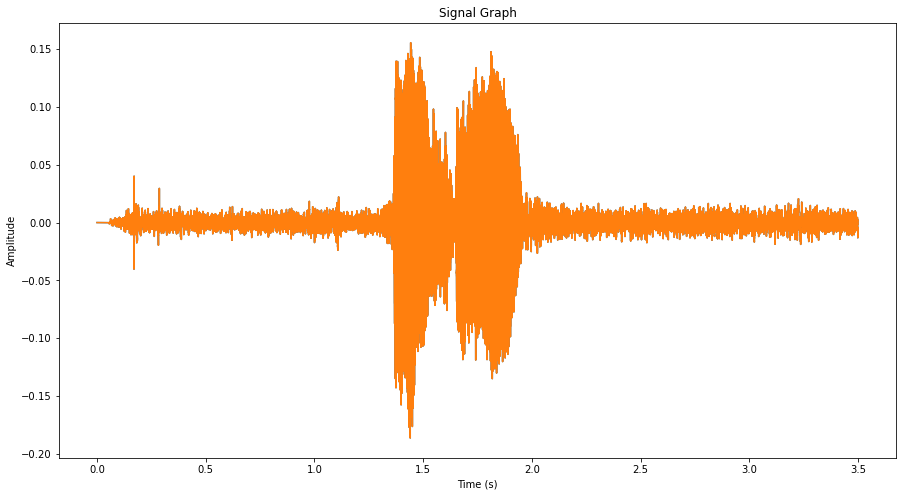

In [7]:

# set parameters
filename = "/Users/abbywongny/Desktop/testing.mp4"

# read audio file
audio = mp.AudioFileClip(filename)

# extract audio data and sample rate
signal = audio.to_soundarray()
samplerate = audio.fps

# calculate signal duration in seconds
duration = len(signal) / samplerate

# create time vector
time = [float(i)/samplerate for i in range(len(signal))]

# plot signal graph
plt.figure(figsize = (15,8))
plt.plot(time, signal)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Signal Graph')

plt.show()


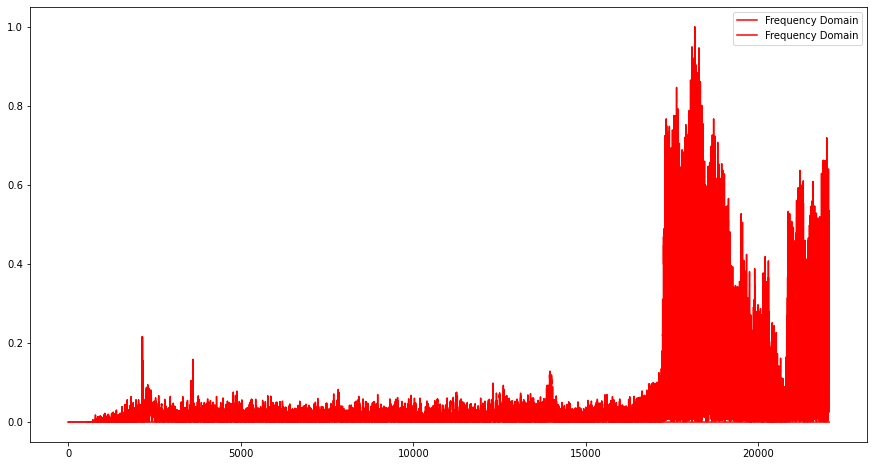

In [5]:

X = fftpack.fft(signal)
freq = fftpack.fftfreq(len(X)) * samplerate

X = X[freq>0]
freq = freq[freq >0]

# Normalize the signals
X = X / np.max(np.abs(X))

plt.figure(figsize = (15,8))
plt.plot(freq, np.abs(X), color='red', label='Frequency Domain')
plt.legend()


<b>filtering</b>

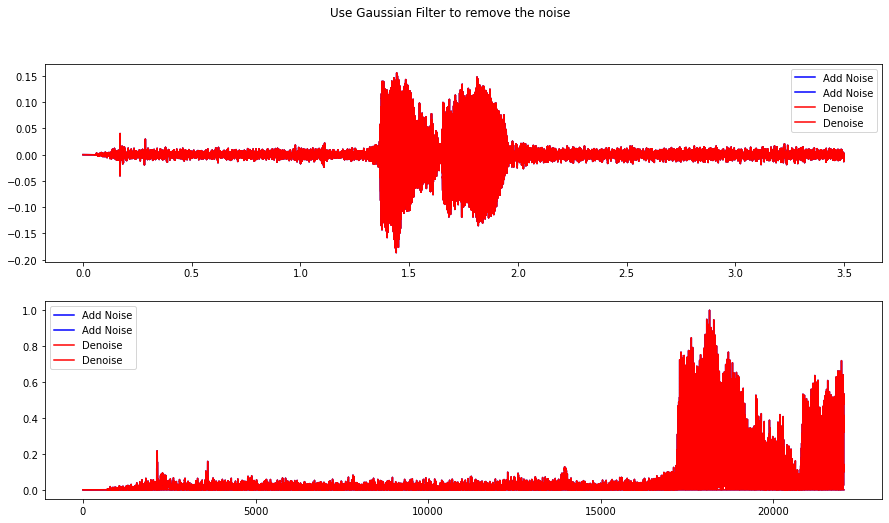

In [6]:
# Use Gaussian Filter to remove the noise
x_filtered = gaussian_filter1d(signal, 10)

# Compute the FFT of the signals
X_filtered = fftpack.fft(x_filtered)
# Compute the frequency domain
freq_filtered = fftpack.fftfreq(len(X_filtered)) * samplerate

# Convert the frequency domain to positive side and below 50Hz
X_filtered = X_filtered[freq_filtered > 0]
freq_filtered = freq_filtered[freq_filtered > 0]


# Normalize the signals
X_filtered = X_filtered / np.max(np.abs(X_filtered))

# Plot the signals in frequency domain
fig, (ax1, ax2) = plt.subplots(2, figsize=(15,8))
fig.suptitle('Use Gaussian Filter to remove the noise')
ax1.plot(time, signal, color='blue', label='Add Noise')
ax1.plot(time, x_filtered, color='red', label='Denoise')
ax1.legend()
ax2.plot(freq, np.abs(X), color='blue', label='Add Noise')
ax2.plot(freq_filtered, np.abs(X_filtered), color='red', label='Denoise')
ax2.legend()

In [45]:
#try filtered audio
wavfile.write("filtered.mp3", samplerate,x_filtered)

In [ ]:


# set parameters
#fs = 192000 # sample rate
fc = 25000 # carrier frequency
#fm = 1000 # modulating frequency
duration = 1 # signal duration

# create time vector
#t = np.linspace(0, duration, duration*fs, False)

# create carrier signal
carrier = np.sin(2*int(np.pi)*fc*time)

# create modulating signal
#modulator = np.sin(2*np.pi*fm*t)

# modulate carrier signal using frequency modulation
deviation = 20000 # frequency deviation
fm_signal = sig.fmmod(signal, fc, samplerate, deviation)

# add FM signal to carrier signal
modulated_signal = carrier + fm_signal

# plot signals in the frequency domain
f, ax = plt.subplots(3, 1, figsize=(10, 8))
ax[0].magnitude_spectrum(carrier, Fs=samplerate, color='blue')
ax[0].set_title('Carrier Signal')
ax[1].magnitude_spectrum(fm_signal, Fs=samplerate, color='green')
ax[1].set_title('Modulated Signal')
ax[2].magnitude_spectrum(modulated_signal, Fs=samplerate, color='red')
ax[2].set_title('FM Signal + Carrier Signal')
plt.tight_layout()
plt.show()

# write modulated signal to file
scaled = np.int16(modulated_signal/np.max(np.abs(modulated_signal)) * 32767)
wavfile.write('modulated_signal.wav', samplerate, scaled)


In [4]:
freq

NameError: name 'freq' is not defined

In [10]:
import numpy as np
from scipy.io.wavfile import write

# set parameters
 # in seconds
sr = samplerate # sample rate
carrier_freq = 50000 # in Hz
#mod_freq = freq # in Hz
amplitude = 0.5 # modulation depth (0-1)

# create time vector
time = np.linspace(0, duration, int(sr*duration), endpoint=False)

# create carrier signal
carrier_signal = np.sin(2*np.pi*carrier_freq*time)

# create modulating signal
#mod_signal = np.sin(2*np.pi*mod_freq*time)

# create modulated signal using amplitude modulation
modulated_signal = (1 + amplitude*signal) * carrier_signal

# write modulated signal to file
scaled = np.int16(modulated_signal/np.max(np.abs(modulated_signal)) * 32767)
wavfile.write('modulated_signal.wav', sr, scaled)


ValueError: operands could not be broadcast together with shapes (154350,2) (154350,) 

In [12]:
print(signal)

[[ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 ...
 [-0.00778198 -0.00778198]
 [-0.00811768 -0.00811768]
 [-0.00805664 -0.00805664]]
